In [2]:
# !pip install -q convokit

In [3]:
import convokit
from convokit import Corpus, download, FightingWords
corpus = Corpus(filename=download('reddit-corpus-small'))

corpus

/Users/danielmlow/miniconda3/envs/rallypoint_suicide_detection/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [4]:
import pandas as pd

Initializing default CountVectorizer with ngram_range (1, 1)... Done.
class1_func returned 2659 valid corpus components. class2_func returned 2736 valid corpus components.
Vocab size is 2054
Comparing language...
ngram zscores computed.


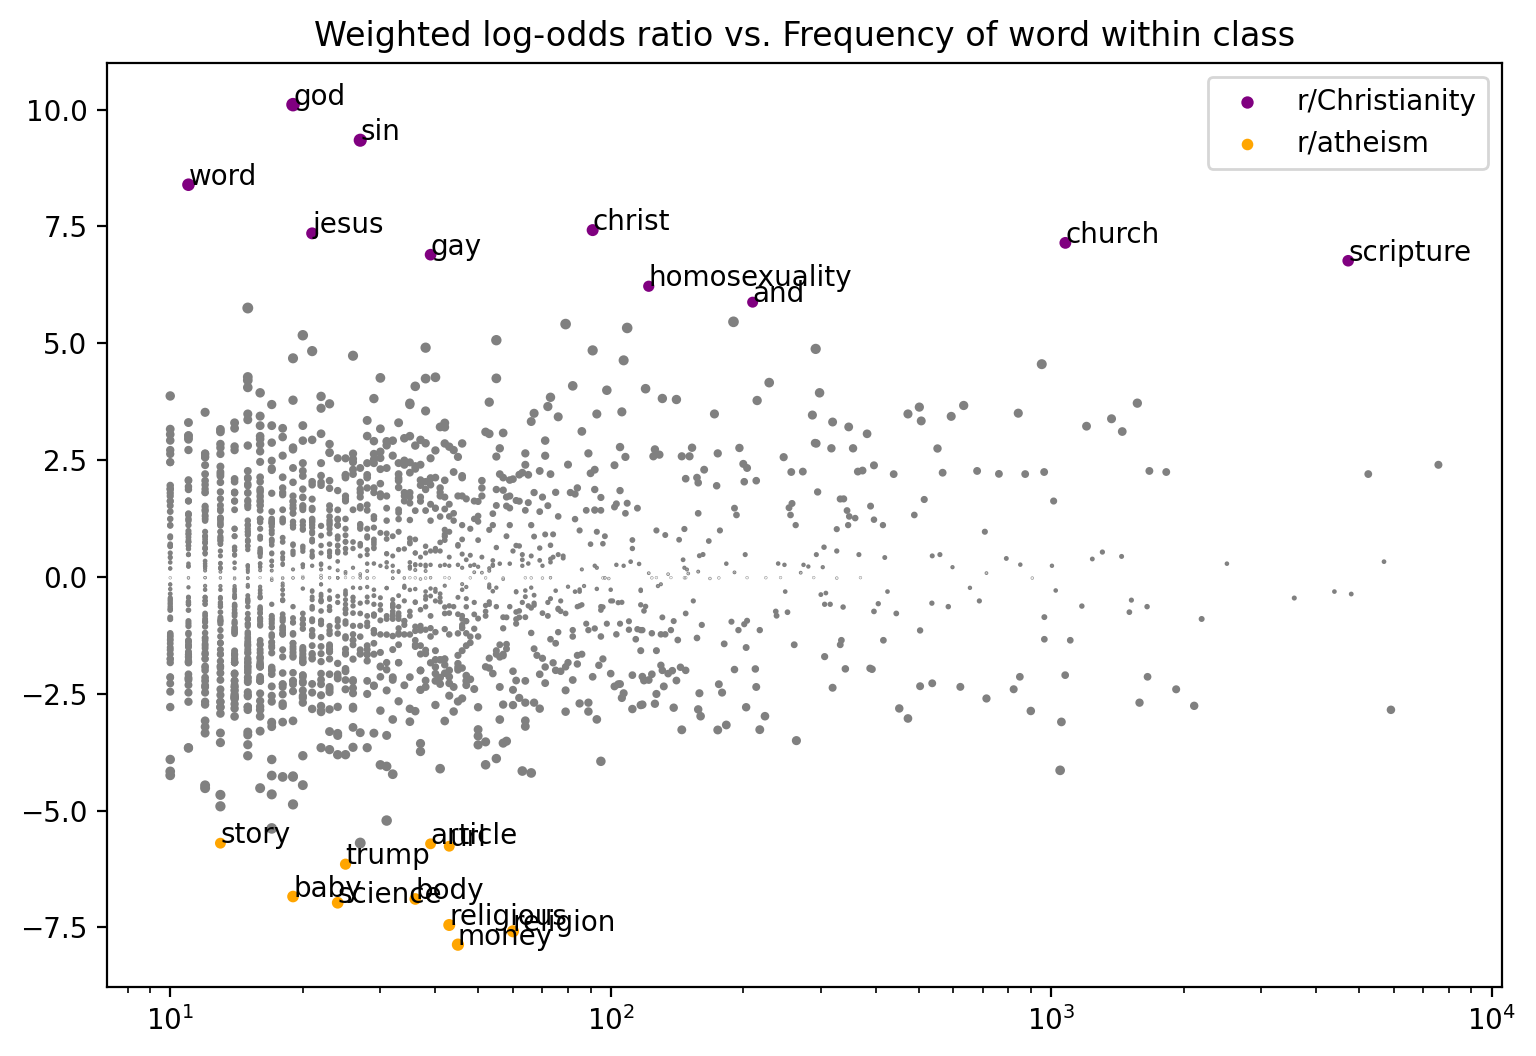

In [5]:


fw = FightingWords(ngram_range=(1,1))
# Initializing default CountVectorizer with ngram_range (1, 1)... Done.
fw.fit(corpus, class1_func=lambda utt: utt.meta['subreddit'] == 'Christianity', 
               class2_func=lambda utt: utt.meta['subreddit'] == "atheism",)

df = fw.summarize(corpus, plot=True, class1_name='r/Christianity', class2_name='r/atheism')

In [6]:
corpus

# Clean version

In [42]:
import re

txt = "hello donald_trump my name is"
re.sub(pattern, "", txt) 


'hello donald_trump my name is'

In [51]:
# import numpy as np
# from sklearn.feature_extraction.text import CountVectorizer as CV
# import string
# exclude = set(string.punctuation)

# def basic_sanitize(in_string):
#     '''Returns a very roughly sanitized version of the input string.'''  
#     in_string = ''.join([ch for ch in in_string if ch not in exclude])
#     in_string = in_string.lower()
#     in_string = ' '.join(in_string.split())
#     return in_string



# import string

# keep_punctuation = ['_']

# remove = string.punctuation

# for keep in keep_punctuation:
#     remove = remove.replace(keep, "") # don't remove hyphens
# pattern = r"[{}]".format(remove) # create the pattern


# def bayes_compare_language(l1, l2, ngram = 1, prior=.01, cv = None,
#                            # threshold_zscore=3
#                           ):
#     '''
#     Arguments:
#     - l1, l2; a list of strings from each language sample
#     - ngram; an int describing up to what n gram you want to consider (1 is unigrams,
#     2 is bigrams + unigrams, etc). Ignored if a custom CountVectorizer is passed.
#     - prior; either a float describing a uniform prior, or a vector describing a prior
#     over vocabulary items. If you're using a predefined vocabulary, make sure to specify that
#     when you make your CountVectorizer object.
#     - cv; a sklearn.feature_extraction.text.CountVectorizer object, if desired.

#     Returns:
#     - A list of length |Vocab| where each entry is a (n-gram, zscore) tuple.'''
#     if cv is None and type(prior) is not float:
#         print("If using a non-uniform prior:")
#         print("Please also pass a count vectorizer with the vocabulary parameter set.")
#         quit()
#     l1 = [basic_sanitize(l) for l in l1]
#     l2 = [basic_sanitize(l) for l in l2]
#     if cv is None:
#         cv = CV(decode_error = 'ignore', min_df = 10, max_df = .5, ngram_range=(1,ngram),
#                 binary = False,
#                 max_features = 15000,
#                 # token_pattern = pattern,
               
#                )
#     counts_mat = cv.fit_transform(l1+l2).toarray()
#     # Now sum over languages...
#     vocab_size = len(cv.vocabulary_)
#     print("Vocab size is {}".format(vocab_size))
#     if type(prior) is float:
#         priors = np.array([prior for i in range(vocab_size)])
#     else:
#         priors = prior
#     z_scores = np.empty(priors.shape[0])
#     count_matrix = np.empty([2, vocab_size], dtype=np.float32)
#     count_matrix[0, :] = np.sum(counts_mat[:len(l1), :], axis = 0)
#     count_matrix[1, :] = np.sum(counts_mat[len(l1):, :], axis = 0)
#     a0 = np.sum(priors)
#     n1 = 1.*np.sum(count_matrix[0,:])
#     n2 = 1.*np.sum(count_matrix[1,:])
#     print("Comparing language...")
#     for i in range(vocab_size):
#         #compute delta
#         term1 = np.log((count_matrix[0,i] + priors[i])/(n1 + a0 - count_matrix[0,i] - priors[i]))
#         term2 = np.log((count_matrix[1,i] + priors[i])/(n2 + a0 - count_matrix[1,i] - priors[i]))        
#         delta = term1 - term2
#         #compute variance on delta
#         var = 1./(count_matrix[0,i] + priors[i]) + 1./(count_matrix[1,i] + priors[i])
#         #store final score
#         z_scores[i] = delta/np.sqrt(var)
#     index_to_term = {v:k for k,v in cv.vocabulary_.items()}
#     sorted_indices = np.argsort(z_scores)
#     return_list = []
#     for i in sorted_indices:
#         return_list.append((index_to_term[i], z_scores[i]))
#     return return_list
#     # return return_list, count

In [44]:
# from google.colab import drive
# drive.mount('/content/drive')
input_dir = './data/input/'
output_dir = './data/output/'

In [45]:
df = pd.read_csv(input_dir+'dataset_preprocessed_keywords.csv', index_col = 0)
df

id                              hash  \
0     3332969.0  2e95be427147cae0d1d1641fecec625f   
1     4581227.0  56846f28e41c759f91696f568b08c3d0   
3     1055741.0  16ff76d6c2b1b1973a2175f0c5759f1d   
4     1410590.0  ea557aca087c5ad9e5e77ce0652f8f1c   
5      679260.0  a607881423c63328c57012204ae9daef   
...         ...                               ...   
6887  1141958.0  ce4d6a624580bb1ecea70a8919a3518a   
6888   704031.0  ce28ec9d3e5452fcb0358e01cc9b672c   
6889  1100198.0  5a1820eed3230dccb1135b535db1684b   
6890  3763452.0  20b88c8d6a836f416696f61162838bcd   
6891   555751.0  4af863b9c598125b9e27296c851aefcb   

                                                content  label   dataset  \
0     That's kinda where I thought it would be, had ...    0.0     Set 5   
1     I am the coach of my- Group for Police Officer...    0.0     Set 6   
3     Good advice. You/we are the ones who are diffe...    0.0     Set 2   
4     That's what I was thinking. I didn't even make...    0.0     Set 1   
5     I'm bad with history, but if recall this was a...    0.0     Set 2   
...                                                 ...    ...       ...   
6887  No charges after US boy, 13, shot dead for ste...    0.0  first500   
6888  That sounds a lot like Engineer promotions rig...    0.0     Set 2   
6889  When I wake up, I don't think about how I feel...    0.0     Set 6   
6890   |body| [ Anybody ever heard/read this anywher...    0.0  first500   
6891  I served 9 in the Navy, from 1984-1993. mostly...    0.0  nock2000   

      reputation  contact_size  type   ancestry  \
0       0.000047      0.000344   0.0  3332904.0   
1       0.167313      0.081946   0.0  4581072.0   
3       0.000450      0.001375   0.0  1021874.0   
4       0.024174      0.014190   0.0  1409920.0   
5       0.000084      0.000687   0.0   136551.0   
...          ...           ...   ...        ...   
6887    0.064488      0.014984   0.5        NaN   
6888    0.002962      0.007042   0.0   699407.0   
6889    0.081236      0.024348   0.0  1099623.0   
6890    0.129806      0.025472   1.0        NaN   
6891    0.000180      0.000150   0.0   531499.0   

                                                   tags  \
0                                      ["donald trump"]   
1       ["ptsd","substance use","victory for veterans"]   
3              ["marriage","children","ptsd","service"]   
4     ["command post","jumpmaster instructor","82nd ...   
5                           ["troops","soldiers","dod"]   
...                                                 ...   
6887                   ["crime","gun control","racism"]   
6888       ["officers","promotions","ltc","maj","army"]   
6889                                     ["ptsd","sgt"]   
6890                                    ["vietnam war"]   
6891  ["ptsd","health","ptsd survivors of america","...   

                                       type_tag_content  split  \
0     type| comment tag| donald trump body| That's k...  train   
1     type| comment tag| ptsd substance use victory ...  train   
3     type| comment tag| marriage children ptsd serv...  train   
4     type| comment tag| command post jumpmaster ins...  train   
5     type| comment tag| troops soldiers dod body| I...  train   
...                                                 ...    ...   
6887  type| Question tag| crime gun control racism b...   test   
6888  type| comment tag| officers promotions ltc maj...   test   
6889  type| comment tag| ptsd sgt body| When I wake ...   test   
6890  type| StatusUpdate tag| vietnam war body|  [ A...   test   
6891  type| comment tag| ptsd health ptsd survivors ...   test   

                                             lemmatized  \
0     that be kinda where I think it would be , have...   
1     I be the coach of my- Group for Police officer...   
3     good advice . you / we be the one who be diffe...   
4     that be what I be think . I do not even make i...   
5     I be bad with history , but if recall this be .

In [46]:
df_present = df[df['label']==1] #suicidal
df_absent = df[df['label']==0] # controls

In [47]:
eval(df_present['tags_kws'].values[0])

['kill',
 'assault',
 'suicide',
 'sexually',
 'talk',
 'captain',
 'rape',
 'sexual',
 'conversation',
 'serve',
 'rank',
 'support']


# TODO: synonymize

In [48]:
suicidal_tags = [' '.join(eval(n)).replace('_',' ') for n in df_present['tags_kws'].values]
nonsuicidal_tags = [' '.join(eval(n)).replace('_',' ') for n in df_absent['tags_kws'].values]


In [49]:
# we can do ngram 1 because our ngrams are joined by _

# ngram_max = 1
# cv = CV(decode_error = 'ignore', min_df = 2, max_df = .5, ngram_range=(1,ngram_max),
#                 binary = False,
#             token_pattern = None,
        
#                 max_features = 15000)

return_list = bayes_compare_language(suicidal_tags,nonsuicidal_tags, ngram = 1, prior=.01, cv = None)

Vocab size is 951
Comparing language...


# Bursting study

In [7]:
df = pd.read_csv(input_dir+'BurstingStudy_DailyData_02_15_2021.csv')
df

ID            time_sent        time_complete   date_sent date_complete  \
0     107  2020-06-30 02:00:00  2020-06-30 03:23:46  2020-06-30    2020-06-30   
1     107  2020-07-01 02:00:00  2020-07-01 05:21:53  2020-07-01    2020-07-01   
2     107  2020-07-03 02:00:00  2020-07-03 02:44:33  2020-07-03    2020-07-03   
3     107  2020-07-12 02:00:00  2020-07-12 06:41:33  2020-07-12    2020-07-12   
4     107  2020-07-14 02:00:00  2020-07-14 05:15:46  2020-07-14    2020-07-14   
...   ...                  ...                  ...         ...           ...   
2330  379  2021-02-06 23:55:00  2021-02-06 23:57:25  2021-02-06    2021-02-06   
2331  379  2021-01-08 23:55:00  2021-01-08 23:59:04  2021-01-08    2021-01-08   
2332  379  2021-01-12 23:55:00  2021-01-12 23:57:21  2021-01-12    2021-01-12   
2333  379  2021-01-06 23:55:00  2021-01-07 05:16:49  2021-01-06    2021-01-06   
2334  379  2021-02-04 23:55:00  2021-02-05 01:07:12  2021-02-04    2021-02-04   

      survey_numb  day_study  Daily_SI_DesireKill  Daily_SI_Urge  \
0               1          0                  7.0            7.0   
1               2          1                 10.0           10.0   
2               3          3                 10.0           10.0   
3               4         12                 10.0           10.0   
4               5         14                  6.0            6.0   
...           ...        ...                  ...            ...   
2330           20         38                  0.0            0.0   
2331            9          9                  0.0            0.0   
2332           11         13                  0.0            0.0   
2333            7          7                  0.0            0.0   
2334           19         36                  0.0            0.0   

      Daily_SI_Intent  ...  Daily_Impul_ActEmotions  Daily_Impul_Impulse  \
0                   8  ...                        4                  4.0   
1                   7  ...                        4                  4.0   
2                  10  ...                        4                  4.0   
3                  10  ...                        4                  4.0   
4                   4  ...                        3                  3.0   
...               ...  ...                      ...                  ...   
2330                0  ...                        0                  0.0   
2331                0  ...                        0                  0.0   
2332                0  ...                        0                  0.0   
2333                0  ...                        0                  0.0   
2334                0  ...                        0                  0.0   

      Daily_Impul_Irrespon  Daily_Impul_Dangerous  Daily_Impul_Ate  \
0                        4                      2              1.0   
1                        4                      2              0.0   
2                        4                      4              0.0   
3                        4                      4              4.0   
4                        2                      2              3.0   
...                    ...                    ...              ...   
2330                     0                      0              0.0   
2331                     0                      0              0.0   
2332                     0                      0              0.0   
2333                     0                      0              0.0   
2334                     0                      0              0.0   

      Daily_SocialSupport_Family  Daily_SocialSupport_Friends  \
0                            NaN                          NaN   
1                            NaN                          NaN   
2                            NaN                          NaN   
3                            NaN                          NaN   
4                            NaN                          NaN   
...                          ...                          ...   
2330    

In [8]:



# clean 
# TODO: https://github.com/blatinier/pyhunspell
# TODO: check for encoding errors
'''
'thought fiancã© finding would never want that. thought people wander never found wondered could that. donâ\x80\x99t think could',
 'â\x80\x9ci canâ\x80\x99t forever. iâ\x80\x99m tired.â\x80\x9d',
'''



'''
0. clean mispellings
1. remove function words
2. tokenize compound words
3. lemmatize

'''

# 0. clean mispellings


text_clean = df.SI_DescribeText.astype(str)
text_clean = text_clean.str.strip() #remove spaces at the beginning and at the end of the string
# text_clean = text_clean.str.strip('.') #remove "." so that with and without are counted together for descriptive purposes
# text_clean = text_clean.str.lower() #lowercase so that Uppper and lower are counted together for descriptive purposes


# Todo replace with remove extra spaces function using apply
text_clean = text_clean.str.replace('    ', ' ') 
text_clean = text_clean.str.replace('   ', ' ') 
text_clean = text_clean.str.replace('  ', ' ') 

# Specific
text_clean = text_clean.replace('NO_ANSWER', 'skipped') 
text_clean = text_clean.replace('NO_ANSWER', 'skipped') 
text_clean = text_clean.replace('SKIPPED', 'skipped') 
text_clean = text_clean.replace('nine', 'none') #consider this a typo
text_clean = text_clean.replace('NA', 'none') #consider this a typo
text_clean = text_clean.replace('nq', 'none') #consider this a typo
text_clean = text_clean.replace('n/q', 'none') #consider this a typo
text_clean = text_clean.replace('na', 'none') #consider this a typo
text_clean = text_clean.replace('n)a', 'none') #consider this a typo
text_clean = text_clean.replace('NA', 'none') #consider this a typo
text_clean = text_clean.replace('None', 'none') 
text_clean = text_clean.replace('NONE', 'none') 
# TODO: choose final label for None
# text_clean = text_clean.replace('none', "answered 'none'") # so its not confused with NaN

text_clean = [n.replace('â\x80\x99', "'").replace('â\x80\x9c', '"').replace('â\x80\x9d', '"').replace('√¢¬Ä¬ú', '"').replace('√¢¬Ä¬ù', '"').replace('√¢¬Ä¬ô', "'") for n in text_clean.values] #to avoid "´" 
text_clean = [n.encode('latin-1').decode('utf-8') for n in text_clean ] # for everything else
text_clean = pd.DataFrame(text_clean)
df['text_clean'] = text_clean.values

df.SI_DescribeText = text_clean
# text_clean[1000:1100:2]



In [90]:
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer as CV
import string
exclude = set(string.punctuation)

def basic_sanitize(in_string):
    '''Returns a very roughly sanitized version of the input string.'''  
    in_string = ''.join([ch for ch in in_string if ch not in exclude])
    in_string = in_string.lower()
    in_string = ' '.join(in_string.split())
    return in_string

def bayes_compare_language(l1, l2, ngram = 1, prior=.01, cv = None, threshold_zscore=3, l1_name = 'Group 1', l2_name = 'Group 2'):
    '''
    Arguments:
    - l1, l2; a list of strings from each language sample
    - ngram; an int describing up to what n gram you want to consider (1 is unigrams,
    2 is bigrams + unigrams, etc). Ignored if a custom CountVectorizer is passed.
    - prior; either a float describing a uniform prior, or a vector describing a prior
    over vocabulary items. If you're using a predefined vocabulary, make sure to specify that
    when you make your CountVectorizer object.
    - cv; a sklearn.feature_extraction.text.CountVectorizer object, if desired.

    Returns:
    - A list of length |Vocab| where each entry is a (n-gram, zscore) tuple.'''

    prior = 0.1
    if cv is None and type(prior) is not float:
        print("If using a non-uniform prior:")
        print("Please also pass a count vectorizer with the vocabulary parameter set.")
        quit()
    l1 = [basic_sanitize(l) for l in l1]
    l2 = [basic_sanitize(l) for l in l2]
    if cv is None:
        cv = CV(decode_error = 'ignore', min_df = 10, max_df = .5, ngram_range=(1,ngram),
                binary = False,
                max_features = 15000)
    cv_fit = cv.fit_transform(l1+l2)
    counts_mat = cv_fit.toarray()
    # Now sum over languages...
    vocab_size = len(cv.vocabulary_)
    print("Vocab size is {}".format(vocab_size))
    if type(prior) is float:
        priors = np.array([prior for i in range(vocab_size)])
    else:
        priors = prior
    z_scores = np.empty(priors.shape[0])
    count_matrix = np.empty([2, vocab_size], dtype=np.float32)
    count_matrix[0, :] = np.sum(counts_mat[:len(l1), :], axis = 0)
    count_matrix[1, :] = np.sum(counts_mat[len(l1):, :], axis = 0)
    a0 = np.sum(priors)
    n1 = 1.*np.sum(count_matrix[0,:])
    n2 = 1.*np.sum(count_matrix[1,:])
    print("Comparing language...")
    for i in range(vocab_size):
        #compute delta
        term1 = np.log((count_matrix[0,i] + priors[i])/(n1 + a0 - count_matrix[0,i] - priors[i]))
        term2 = np.log((count_matrix[1,i] + priors[i])/(n2 + a0 - count_matrix[1,i] - priors[i]))        
        delta = term1 - term2
        #compute variance on delta
        var = 1./(count_matrix[0,i] + priors[i]) + 1./(count_matrix[1,i] + priors[i])
        #store final score
        z_scores[i] = delta/np.sqrt(var)
    index_to_term = {v:k for k,v in cv.vocabulary_.items()}
    sorted_indices = np.argsort(z_scores)
    return_list = []
    for i in sorted_indices:
        return_list.append((index_to_term[i], z_scores[i]))

    zscores = pd.DataFrame(return_list,columns = ['token', 'zscore'])
    feature_names = cv.get_feature_names_out()
    frequency_counts = cv_fit.toarray().sum(axis=0)
    freq = pd.DataFrame([feature_names, frequency_counts], index = ['token', 'count']).T
    zscores = zscores.merge(freq,on='token')
    
    zscores['label']= [l1_name if n >0 else l1_name for n in zscores['zscore'].values]

    annotation_names = []
    for token, boolean in zip(zscores['token'].values, pd.DataFrame(zscores['zscore'].abs()>=threshold_zscore).values):
      if boolean:
        annotation_names.append(token)
      else:
        annotation_names.append('')
    zscores['annotation_names']=annotation_names
    print("Comparing language: Done.")


    return zscores

    

In [79]:
%%time


zsores = bayes_compare_language(suicidal_tags,nonsuicidal_tags, ngram = None, prior=.01, cv = cv)
zsores

Vocab size is 8416
Comparing language...
Comparing language: Done.
CPU times: user 463 ms, sys: 272 ms, total: 735 ms
Wall time: 828 ms


token     zscore count                           label  \
0          humor  -5.503734   423   more likely with lower scores   
1       military  -4.007728  1072   more likely with lower scores   
2         career  -3.832917   207   more likely with lower scores   
3        officer  -3.434584   211   more likely with lower scores   
4            gun  -2.954749   202   more likely with lower scores   
...          ...        ...   ...                             ...   
8411      mental   7.763338   380  more likely with higher scores   
8412  depression   9.737295   321  more likely with higher scores   
8413        ptsd  10.646519  1006  more likely with higher scores   
8414    suicidal  12.035064   234  more likely with higher scores   
8415     suicide  18.736833   835  more likely with higher scores   

     annotation_names  
0               humor  
1            military  
2              career  
3             officer  
4                      
...               ...  
8411           mental  
8412       depression  
8413             ptsd  
8414         suicidal  
8415          suicide  

[8416 rows x 5 columns]

In [56]:
import matplotlib.pyplot as plt

In [57]:
import plotly.graph_objects as go

In [58]:
# plt.scatter(zscores['count'].values, zscores.zscore.values)

In [88]:
np.log10**2.3

TypeError: unsupported operand type(s) for ** or pow(): 'numpy.ufunc' and 'float'

In [81]:
np.log(835)

6.727431724850855

In [59]:
df.columns

Index(['id', 'hash', 'content', 'label', 'dataset', 'reputation',
       'contact_size', 'type', 'ancestry', 'tags', 'type_tag_content', 'split',
       'lemmatized', 'lemmatized_wo_stopwords', 'keybert_keywords',
       'keywords_len', 'tags_lemmatized', 'tags_kws'],
      dtype='object')

In [63]:
import datetime


Vocab size is 8416
Comparing language...
Comparing language: Done.


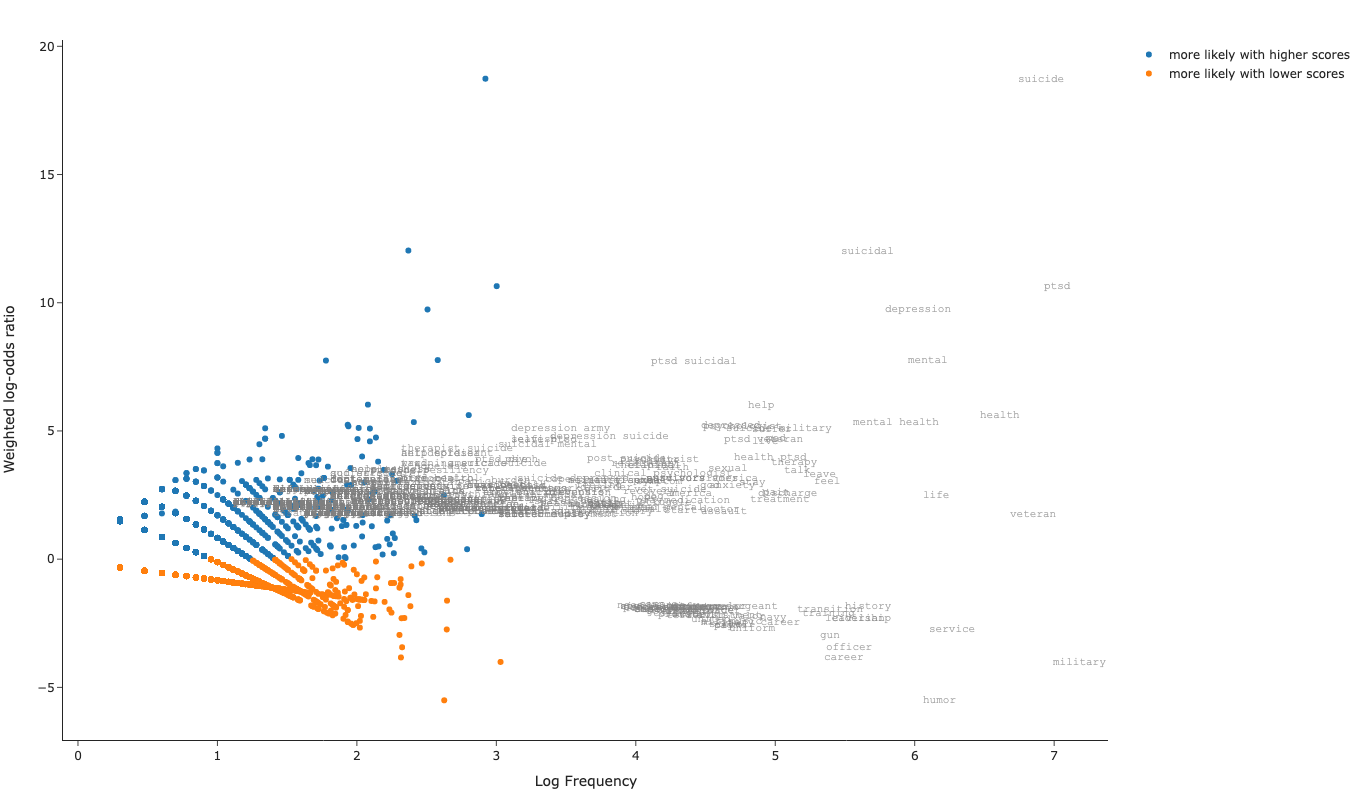

NameError: name 'fig_i' is not defined

In [89]:
%%time 
l1 = suicidal_tags
l2 = nonsuicidal_tags

l1_name = 'Suicidal'
l2_name = 'Non-suicidal'

ts = datetime.datetime.utcnow().strftime('%y-%m-%dT%H-%M-%S')

# config
save_all_in_one = True
save_all_in_one_path = output_dir+f'odds_ratio_{ts}.html'  
figsize = [1200,800]
threshold = 1 #rating scale
threshold_zscore = 1.75 #abs value
# col = 'Daily_SI_Intent'
# df = df[df.SI_DescribeText!='nan'] #remove nan

ngram_range = (1,2)
cv = CV(decode_error = 'ignore', min_df = 2, max_df = .8, ngram_range=ngram_range,
                binary = False,
        stop_words ='english',
                max_features = 15000)



zscores = bayes_compare_language(l1, l2, ngram = 1, prior=.01, cv = cv, threshold_zscore=threshold_zscore, l1_name = l1_name, l2_name = l2_name )
annotation_names = zscores.annotation_names.values
# ========================================================================


fig = go.Figure()
# palette = cycle(px.colors.qualitative.Light24)
colors = {}

# 
# for grouping in data['label'].unique():
# data_group = data[data['label']==grouping]
# y_encoded = LabelEncoder().fit_transform(data_group['label'])
# color_i =  next(palette)

high =  zscores[zscores['zscore']>0]
low =  zscores[zscores['zscore']<0]



for group in [high, low]:
    x = np.log10(group['count'].values.astype(float))
    fig.add_trace(go.Scatter(x=x,
                              y=group['zscore'],
                              mode='markers',
                              # marker_color=color_i,
                            name = group['label'].values[0],
                          #  legendgroup= data['label'].values,

                          #  color = zscores['label'],
                              text=group['token'].values,#group[['token',	'zscore',	'count',	'l1',	'l2']].values,
            hovertemplate = '<b>%{text}</b><br>'+
                            'log odds: %{y:.2f}<br>'+
                            'Frequency: %{x}'
                            ,
                            hoverinfo='text',
                          #  show_legend=True,
                            )) # hover text goes here
    # colors[grouping] = color_i


for x1_i,x2_i, annotate_names_test_i in zip(zscores['count'],zscores['zscore'],annotation_names):
    x1_i= np.log(x1_i.astype(float))
    if annotate_names_test_i=='':
      continue
    fig.add_annotation(
              x=x1_i, y=x2_i,
              xref="x",
              yref="y",


              showarrow=False,
              text=annotate_names_test_i,
              font=dict(
                  family="Courier New, monospace",
                  size=11,
                  color = 'gray',
                  # color="#ffffff"
                  ),
              align='center', #within box
              arrowhead=1,
              arrowsize=1,
              # arrowwidth=2,
              xanchor = 'left', #with regards to point marker
              arrowcolor="grey",
              ax=-100,
              ay=0,
              # bordercolor="#c7c7c7",
              # borderwidth=2,
              # borderpad=4,
              # bgcolor="grey",
              opacity=0.7
              )


  # fig.update_layout(scene=dict(annotations=dict(bgcolor='white',opacity='0.6'))) https://stackoverflow.com/questions/62780324/background-colour-for-text-labels-in-plotly
fig.update_traces(showlegend=True)

margins = 40
fig.update_layout(
  # title=title,
  # title_x=0.5,
  template='simple_white',
autosize=False,
width=figsize[0],
height=figsize[1],
margin=dict(
  l=margins,
  r=margins*2,
  b=margins,
  t=margins,
  pad=1
),
paper_bgcolor="white",
xaxis=dict(
  title="Log Frequency"
),
yaxis=dict(
  title="Weighted log-odds ratio"
),
# xaxis_range=[-9,40]

)


# figs.append(fig)
fig.show()


if save_all_in_one:
  # for fig_i in figs:
    with open(save_all_in_one_path, 'a') as f:
      f.write(fig_i.to_html(full_html=False, include_plotlyjs='cdn'))



# Bursting study

Vocab size is 5463
Comparing language...


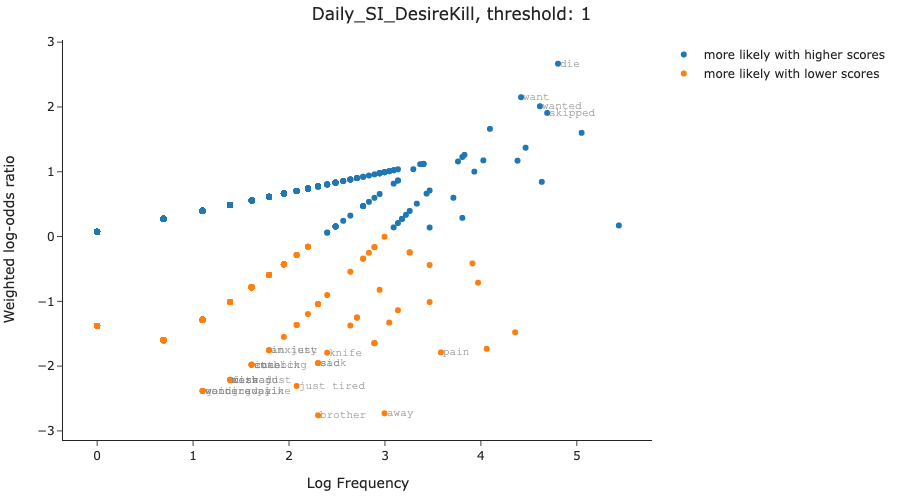

Vocab size is 5466
Comparing language...


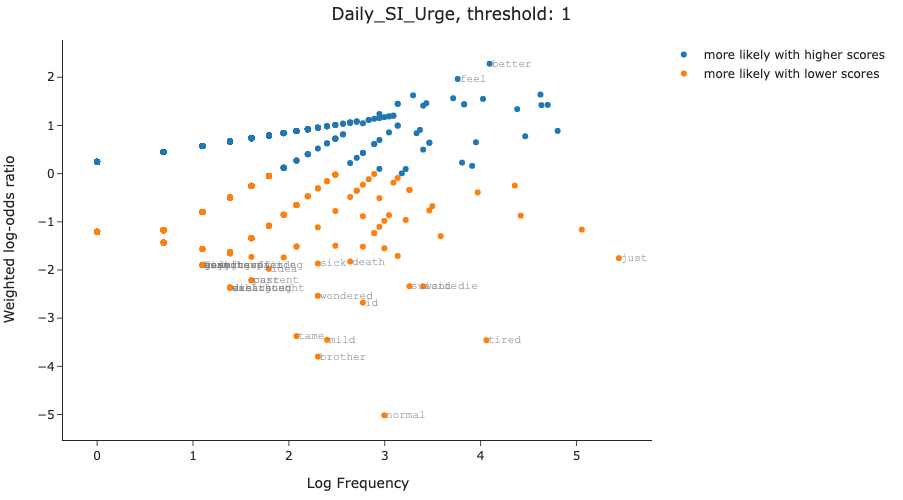

Vocab size is 5466
Comparing language...


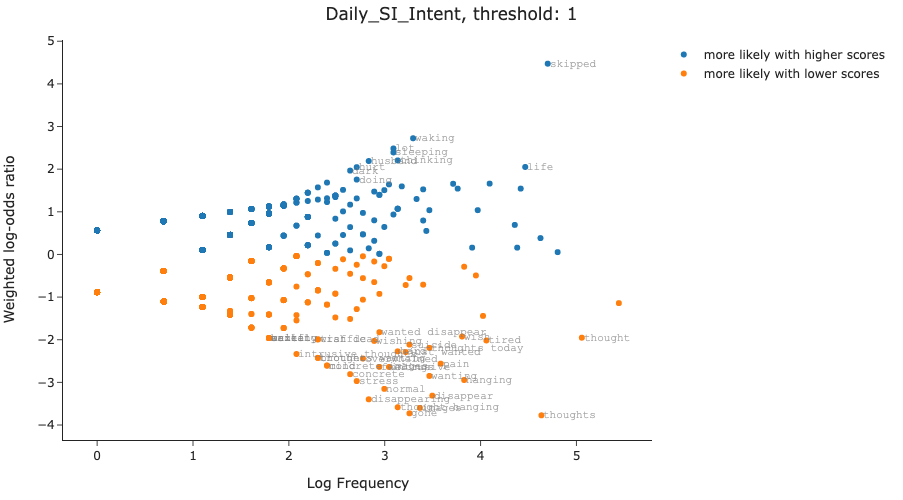

In [15]:


# config
save_all_in_one = True
save_all_in_one_path = output_dir+f'odds_ratio_{ts}.html'  
figsize = [1200,500]
threshold = 1 #rating scale
threshold_zscore = 1.75 #abs value
col = 'Daily_SI_Intent'
df = df[df.SI_DescribeText!='nan'] #remove nan
ngram = (1,2)
cv = CV(decode_error = 'ignore', min_df = 1, max_df = .8, ngram_range=ngram,
                binary = False,
        stop_words ='english',
                max_features = 15000)


figs = []

for col in ['Daily_SI_DesireKill', 'Daily_SI_Urge','Daily_SI_Intent' ]:
  title = f'{col}, threshold: {threshold}'
  l1 = df[df[col]>=threshold]['SI_DescribeText'].values
  l2 = df[df[col]<threshold]['SI_DescribeText'].values
  l1 = [str(n) for n in l1]
  l2 = [str(n) for n in l2]

  zscores = bayes_compare_language(l1, l2, ngram = 1, prior=.01, cv = cv, threshold_zscore=threshold_zscore)
  annotation_names = zscores.annotation_names.values
  # ========================================================================


  fig = go.Figure()
  # palette = cycle(px.colors.qualitative.Light24)
  colors = {}

  # 
  # for grouping in data['label'].unique():
  # data_group = data[data['label']==grouping]
  # y_encoded = LabelEncoder().fit_transform(data_group['label'])
  # color_i =  next(palette)

  high =  zscores[zscores['zscore']>0]
  low =  zscores[zscores['zscore']<0]

  

  for group in [high, low]:
    x = np.log(group['count'].values.astype(float))
    fig.add_trace(go.Scatter(x=x,
                              y=group['zscore'],
                              mode='markers',
                              # marker_color=color_i,
                            name = group['label'].values[0],
                          #  legendgroup= data['label'].values,
                            
                          #  color = zscores['label'],
                              text=group['token'].values,#group[['token',	'zscore',	'count',	'l1',	'l2']].values,
            hovertemplate = '<b>%{text}</b><br>'+
                            'log odds: %{y:.2f}<br>'+
                            'Frequency: %{x}'
                            ,
                            hoverinfo='text',
                          #  show_legend=True,
                            )) # hover text goes here
  # colors[grouping] = color_i


  for x1_i,x2_i, annotate_names_test_i in zip(zscores['count'],zscores['zscore'],annotation_names):
    x1_i= np.log(x1_i.astype(float))
    if annotate_names_test_i=='':
      continue
    fig.add_annotation(
              x=x1_i, y=x2_i,
              xref="x",
              yref="y",
              
              
              showarrow=False,
              text=annotate_names_test_i,
              font=dict(
                  family="Courier New, monospace",
                  size=11,
                  color = 'gray',
                  # color="#ffffff"
                  ),
              align='center', #within box
              arrowhead=1,
              arrowsize=1,
              # arrowwidth=2,
              xanchor = 'left', #with regards to point marker
              arrowcolor="grey",
              ax=-100,
              ay=0,
              # bordercolor="#c7c7c7",
              # borderwidth=2,
              # borderpad=4,
              # bgcolor="grey",
              opacity=0.7
              )


      # fig.update_layout(scene=dict(annotations=dict(bgcolor='white',opacity='0.6'))) https://stackoverflow.com/questions/62780324/background-colour-for-text-labels-in-plotly
  fig.update_traces(showlegend=True)

  margins = 40
  fig.update_layout(
      title=title,
      title_x=0.5,
      template='simple_white',
  autosize=False,
  width=figsize[0],
  height=figsize[1],
  margin=dict(
      l=margins,
      r=margins*2,
      b=margins,
      t=margins,
      pad=1
  ),
  paper_bgcolor="white",
  xaxis=dict(
      title="Log Frequency"
  ),
  yaxis=dict(
      title="Weighted log-odds ratio"
  ),
  # xaxis_range=[-9,40]

  )


  figs.append(fig)
  fig.show()


if save_all_in_one:
  for fig_i in figs:
    with open(save_all_in_one_path, 'a') as f:
      f.write(fig_i.to_html(full_html=False, include_plotlyjs='cdn'))